In [2]:
import pandas as pd
import wandb
import os 
import sys 
__file__ = 'wandb_test.ipynd'
os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
api = wandb.Api()
entity, project = "tpn", "rllib_all"
runs = api.runs(entity + "/" + project)
RESULTS_DIR = os.path.join(os.path.dirname(__file__), '..', 'results')
ALGORITHM_TYPES = ["independent", "centralized", "shared"]
REWARD_TYPES = ["type_1", "type_2", "type_3"]
STEP_PENALTY = [0, 0.01, 0.03]
ALGORITHM_TYPE = "independent"
REWARD_TYPE = "type_1"

This cell prints the performances of the agents in the file > results/stats_PROJECT_NAME_RUNS.txt

In [3]:
_run_stats = dict()
collated_performances_df = pd.DataFrame(
    [],
    columns = ['step_penalty', 'algorithm_type', 'reward_type', 'lstm',
        'episode_length', 'episode_reward', 'epsiode_assists',\
               'eval_length', 'eval_reward', 'eval_assists']
).fillna(0)


for run in runs:
    # if run._state != "finished":
    if run._state != "finished":
        if run._state == "running":
            _run_stats['running_runs'] = _run_stats.get('running_runs', 0) + 1
        else:
            _run_stats['crashed_runs'] = _run_stats.get('crashed_runs', 0) + 1
        continue
    _run_stats['finished_runs'] = _run_stats.get('finished_runs', 0) + 1

    config = run.config
    algo_type = config['algorithm_type']
    reward_type = config['env_config']['reward_type']
    step_penalty = config['env_config']['step_penalty']
    use_lstm = config['training']['model']['use_lstm']
    collated_performances_df.loc[len(collated_performances_df)] = [
        step_penalty,
        algo_type,
        reward_type,
        use_lstm,
        run.summary['episode_len_mean'],
        run.summary['episode_reward_mean'],
        run.summary['episode_assists_mean'],
        run.summary['eval_episode_len'],
        run.summary['eval_reward'],
        run.summary['eval_assists']
    ]

print(f"F: {_run_stats.get('finished_runs', 0)}, R: {_run_stats.get('running_runs', 0)}, C: {_run_stats.get('crashed_runs', 0)}")
collated_performances_df = collated_performances_df.groupby(['step_penalty', 'reward_type', 'lstm', 'algorithm_type']).agg(['mean', 'std', 'count'])
with open(f"{RESULTS_DIR}/stats_{project}_{_run_stats.get('finished_runs')}.txt", 'a') as f:
    f.write(f"Finished: {_run_stats.get('finished_runs', 0)}, Running: {_run_stats.get('running_runs', 0)}, Crashed: {_run_stats.get('crashed_runs', 0)}\n")
    f.write(collated_performances_df.to_string())
    f.write("\n\n\n")
    # f.write(collated_performances_df.to_latex())
    # f.write("\n\n\n")
    # f.write(collated_performances_df.to_markdown())
    # f.write("\n\n\n")
collated_performances_df
    

F: 244, R: 64, C: 0


episode_length                   \
                                                       mean        std count   
step_penalty reward_type lstm algorithm_type                                   
-0.03        type_1      True independent         53.102000  10.098028    40   
             type_2      True independent         53.418750   8.565355    40   
-0.01        type_1      True independent         54.275610   8.091515    41   
             type_2      True independent         55.539512   7.566037    41   
 0.00        type_1      True independent         54.675610   5.941535    41   
             type_2      True independent         58.664634  10.242919    41   

                                             episode_reward                  \
                                                       mean       std count   
step_penalty reward_type lstm algorithm_type                                  
-0.03        type_1      True independent          2.867963  0.867837    40   
             type_2      True independent          3.108080  0.843404    40   
-0.01        type_1      True independent          4.856983  0.345097    41   
             type_2      True independent          5.150407  0.303217    41   
 0.00        type_1      True independent          5.896098  0.089635    41   
             type_2      True independent          6.018732  0.709911    41   

                                             epsiode_assists                  \
                                                        mean       std count   
step_penalty reward_type lstm algorithm_type                                   
-0.03        type_1      True independent           0.349750  0.099085    40   
             type_2      True independent           0.422000  0.147617    40   
-0.01        type_1      True independent           0.379024  0.123041    41   
             type_2      True independent           0.511463  0.220086    41   
 0.00        type_1      True independent           0.387317  0.087465    41   
             type_2      True independent           0.464146  0.224410    41   

                                             eval_length                   \
                                                    mean        std count   
step_penalty reward_type lstm algorithm_type                                
-0.03        type_1      True independent      52.978948  10.510942    40   
             type_2      True independent      52.880921   9.275174    40   
-0.01        type_1      True independent      54.644294   8.225607    41   
             type_2      True independent      56.006283   9.839173    41   
 0.00        type_1      True independent      55.324990   6.932920    41   
             type_2      True independent      59.421651  11.624734    41   

                                             eval_reward                  \
                                                    mean       std count   
step_penalty reward_type lstm algorithm_type                               
-0.03        type_1      True independent       2.879648  0.964188    40   
             type_2      True independent       3.140781  0.796211    40   
-0.01        type_1      True independent       4.846260  0.357786    41   
             type_2      True independent       5.103958  0.361339    41   
 0.00        type_1      True independent       5.886156  0.122632    41   
             type_2      True independent       6.036218  0.792283    41   

                                             eval_assists                  
                                                     mean       std count  
step_penalty reward_type lstm algorithm_type                               
-0.03        type_1      True independent        0.331171  0.152733    40  
             type_2      True independent        0.402574  0.201161    40  
-0.01        type_1      True independent        0.400082  0.186395    41  
             type_2      True independent        0.46999

In [18]:
_run_stats = dict()
collated_performances_df = pd.DataFrame(
    [],
    columns = ['step_penalty', 'algorithm_type', 'reward_type', 'lstm',
        'episode_length', 'episode_reward', 'epsiode_assists',\
               'eval_length', 'eval_reward', 'eval_assists']
).fillna(0)


for run in runs:
    # if run._state != "finished":
    if run._state != "finished":
        if run._state == "running":
            _run_stats['running_runs'] = _run_stats.get('running_runs', 0) + 1
        else:
            _run_stats['crashed_runs'] = _run_stats.get('crashed_runs', 0) + 1
        continue
    _run_stats['finished_runs'] = _run_stats.get('finished_runs', 0) + 1

    config = run.config
    algo_type = config['algorithm_type']
    reward_type = config['env_config']['reward_type']
    step_penalty = config['env_config']['step_penalty']
    use_lstm = config['training']['model']['use_lstm']
    collated_performances_df.loc[len(collated_performances_df)] = [
        step_penalty,
        algo_type,
        reward_type,
        use_lstm,
        run.summary['episode_len_mean'],
        run.summary['episode_reward_mean'],
        run.summary['episode_assists_mean'],
        run.summary['eval_episode_len'],
        run.summary['eval_reward'],
        run.summary['eval_assists']
    ]

print(f"F: {_run_stats.get('finished_runs', 0)}, R: {_run_stats.get('running_runs', 0)}, C: {_run_stats.get('crashed_runs', 0)}")
collated_performances_df = collated_performances_df.groupby(['step_penalty', 'reward_type', 'lstm', 'algorithm_type']).agg(['mean', 'std', 'count'])
with open(f"{RESULTS_DIR}/stats_{project}_{_run_stats.get('finished_runs')}.txt", 'a') as f:
    f.write(f"Finished: {_run_stats.get('finished_runs', 0)}, Running: {_run_stats.get('running_runs', 0)}, Crashed: {_run_stats.get('crashed_runs', 0)}\n")
    f.write(collated_performances_df.to_string())
    f.write("\n\n\n")
    # f.write(collated_performances_df.to_latex())
    # f.write("\n\n\n")
    # f.write(collated_performances_df.to_markdown())
    # f.write("\n\n\n")
collated_performances_df
    

F: 244, R: 64, C: 0


episode_length                   \
                                                       mean        std count   
step_penalty reward_type lstm algorithm_type                                   
-0.03        type_1      True independent         53.102000  10.098028    40   
             type_2      True independent         53.418750   8.565355    40   
-0.01        type_1      True independent         54.275610   8.091515    41   
             type_2      True independent         55.539512   7.566037    41   
 0.00        type_1      True independent         54.675610   5.941535    41   
             type_2      True independent         58.664634  10.242919    41   

                                             episode_reward                  \
                                                       mean       std count   
step_penalty reward_type lstm algorithm_type                                  
-0.03        type_1      True independent          2.867963  0.867837    40   
             type_2      True independent          3.108080  0.843404    40   
-0.01        type_1      True independent          4.856983  0.345097    41   
             type_2      True independent          5.150407  0.303217    41   
 0.00        type_1      True independent          5.896098  0.089635    41   
             type_2      True independent          6.018732  0.709911    41   

                                             epsiode_assists                  \
                                                        mean       std count   
step_penalty reward_type lstm algorithm_type                                   
-0.03        type_1      True independent           0.349750  0.099085    40   
             type_2      True independent           0.422000  0.147617    40   
-0.01        type_1      True independent           0.379024  0.123041    41   
             type_2      True independent           0.511463  0.220086    41   
 0.00        type_1      True independent           0.387317  0.087465    41   
             type_2      True independent           0.464146  0.224410    41   

                                             eval_length                   \
                                                    mean        std count   
step_penalty reward_type lstm algorithm_type                                
-0.03        type_1      True independent      52.978948  10.510942    40   
             type_2      True independent      52.880921   9.275174    40   
-0.01        type_1      True independent      54.644294   8.225607    41   
             type_2      True independent      56.006283   9.839173    41   
 0.00        type_1      True independent      55.324990   6.932920    41   
             type_2      True independent      59.421651  11.624734    41   

                                             eval_reward                  \
                                                    mean       std count   
step_penalty reward_type lstm algorithm_type                               
-0.03        type_1      True independent       2.879648  0.964188    40   
             type_2      True independent       3.140781  0.796211    40   
-0.01        type_1      True independent       4.846260  0.357786    41   
             type_2      True independent       5.103958  0.361339    41   
 0.00        type_1      True independent       5.886156  0.122632    41   
             type_2      True independent       6.036218  0.792283    41   

                                             eval_assists                  
                                                     mean       std count  
step_penalty reward_type lstm algorithm_type                               
-0.03        type_1      True independent        0.331171  0.152733    40  
             type_2      True independent        0.402574  0.201161    40  
-0.01        type_1      True independent        0.400082  0.186395    41  
             type_2      True independent        0.46999

This cell prints the collated analysis df for each group [step_penalty, algo_type, reward_type] and writes them in files > [r]-[algo_type]_[reward_type]_[step_penalty]

In [21]:
import re
RUN_IDS = ["df1702684118", "df1702598855", "df1702595444"]
def get_analysis_df(algo_type, reward_type, step_penalty, use_lstm):
    file_name_prefix = "" # _chaser, _fixed, _follower
    _run_stats = dict()
    big_analysis_df = None
    run_history_df = pd.DataFrame(
        [],
            columns = [
            'run_name',
            'trial_count',
            'training_iteration',
            'episodes_total',
            'train_len',
            'train_reward',
            'train_assists',
            'eval_len',
            'eval_reward',
            'eval_assists',
            'analysis_len',
            'analysis_reward',
            'analysis_assists',]
    ).fillna(0) 
    eval_df = None
    for run in runs:
        config = run.config
        if config['algorithm_type'] != algo_type or \
            config['env_config']['reward_type'] != reward_type or \
                config['env_config']['step_penalty'] != step_penalty or \
                    config['training']['model']['use_lstm'] != use_lstm:
                    continue

        if run._state != "finished":
            if run._state == "running":
                _run_stats['running_runs'] = _run_stats.get('running_runs', 0) + 1
            else:
                _run_stats['crashed_runs'] = _run_stats.get('crashed_runs', 0) + 1
            continue
        _run_stats['finished_runs'] = _run_stats.get('finished_runs', 0) + 1

        if config['algorithm_type'] == algo_type and \
            config['env_config']['reward_type'] == reward_type and \
                config['env_config']['step_penalty'] == step_penalty and \
                    config['training']['model']['use_lstm'] == use_lstm:
            _run_stats['matching_runs'] = _run_stats.get('matching_runs', 0) + 1

            if file_name_prefix == "":
                file_name_prefix = algo_type 
            
            # if len(RUN_IDS) > 0 and run.name not in RUN_IDS:
            #     continue

            for file in run.files():
                if f"{file_name_prefix}_analysis" in file.name:
                    analysis_df = pd.read_json(
                        file.download(exist_ok=True), 
                        orient='split')
                    for file in run.files():
                        if f"{file_name_prefix}_eval" in file.name:
                            eval_stats = pd.read_json(
                                file.download(exist_ok=True), 
                                orient='split')
                            break
                    col_list = analysis_df.groupby(['mode', 'agent_a', 'agent_b', 'test', 'dimension']).count().columns
                    agg_funcs = []
                    for col in col_list:
                        if col == 'run_id':
                            agg_funcs.append((col, 'nunique'))
                        else:
                            agg_funcs.append((col, 'mean'))
                    analysis_df = analysis_df.groupby(['mode', 'agent_a', 'agent_b', 'test', 'dimension']).agg(
                        dict(agg_funcs)
                    ).reset_index()
                    analysis_df['trial_count'] = analysis_df['run_id']
                    analysis_df.drop(columns=['run_id'], inplace=True)
                    analysis_df['run_name'] = run.name
                    analysis_df['episode_len'] = run.summary['episode_len_mean']
                    analysis_df['episode_reward'] = run.summary['episode_reward_mean']
                    analysis_df['episode_assists'] = run.summary['episode_assists_mean']
                    analysis_df['eval_len'] = run.summary['eval_episode_len']
                    analysis_df['eval_assists'] = run.summary['eval_assists']
                    analysis_df['eval_reward'] = run.summary['eval_reward']


                    big_analysis_df = pd.concat([big_analysis_df, analysis_df]) if big_analysis_df is not None else analysis_df

                    run_history_df.loc[len(run_history_df)] = [
                        run.name,
                        analysis_df['trial_count'][0],
                        run.summary['training_iteration'],
                        run.summary['episodes_total'],
                        run.summary['episode_len_mean'],
                        run.summary['episode_reward_mean'],
                        run.summary['episode_assists_mean'],
                        run.summary['eval_episode_len'],
                        run.summary['eval_reward'],
                        run.summary['eval_assists'],
                        eval_stats['episode_len'].mean(),
                        eval_stats['episode_reward'].mean(),
                        eval_stats['assists'].mean()]
    if len(run_history_df) == 0:
        return None, None, _run_stats
    
    grouped = big_analysis_df.copy()
    grouped = grouped.groupby(['mode', 'agent_a', 'agent_b', 'test', 'dimension'])
    
    big_analysis_df.drop(columns=['episode_len', 'episode_reward', 'episode_assists', 'eval_len', 'eval_reward', 'eval_assists'], inplace=True)
    col_list = big_analysis_df.groupby(['mode', 'agent_a', 'agent_b', 'test', 'dimension']).count().columns
    agg_funcs = []
    for col in col_list:
        if col == 'run_name':
            agg_funcs.append((col, 'nunique'))
        elif col == 'trial_count':
            agg_funcs.append((col, 'sum'))
        else:
            agg_funcs.append((col, 'mean'))

    big_analysis_df = big_analysis_df.groupby(['mode', 'agent_a', 'agent_b', 'test', 'dimension']).agg(
        dict(agg_funcs)
    )
    run_history_df.set_index('run_name', inplace=True)  
    return big_analysis_df, run_history_df, _run_stats, grouped
                
for algo_type in ['independent']:
    for reward_type in ['type_3']:
        for step_penalty in [-0.01]:
            for use_lstm in [True]:
                analysis_df, run_history_df, _run_stats, grouped = get_analysis_df(
                algo_type,
                reward_type,
                step_penalty,
                use_lstm)
                print(f"{algo_type}, {reward_type}, {step_penalty}: {_run_stats}")

                if analysis_df is None:
                    continue

                # stop
                import signal
                signal.raise_signal(signal.SIGINT) 

                file_name = f"{algo_type}_{reward_type}_{step_penalty}"
                if use_lstm:
                    file_name  = "r-" + file_name
                # Create dat files here and write to results/data
                                


                file_name = project+"_"+file_name +".txt"
                import warnings
                warnings.warn("Overwriting filename")
                file_name = "rnn_test.txt"
                with open(f"{RESULTS_DIR}/{file_name}", 'a') as f:
                    descr = f"""{algo_type}, {reward_type}, {step_penalty}: {_run_stats}
                    COMPLETED RUNS: {_run_stats.get('finished_runs', 0)}
                    RUNNING RUNS: {_run_stats.get('running_runs', 0)}
                    CRASHED RUNS: {_run_stats.get('crashed_runs', 0)}
                    TOTAL = {_run_stats.get('finished_runs', 0) + _run_stats.get('running_runs', 0) + _run_stats.get('crashed_runs', 0)}
                    \nBASE PERFORMANCE: {run_history_df.mean()}
                    """
                    print(descr)
                    f.write(descr)
                    f.write(analysis_df.to_string())
                    f.write(run_history_df.to_string())
                    f.write("\n\n\n")
                    # f.write(run_history_df.to_latex())
                    # f.write("\n\n\n")
                    # f.write(run_history_df.to_markdown())
                    # f.write("\n\n\n")
 

ValueError: not enough values to unpack (expected 4, got 3)

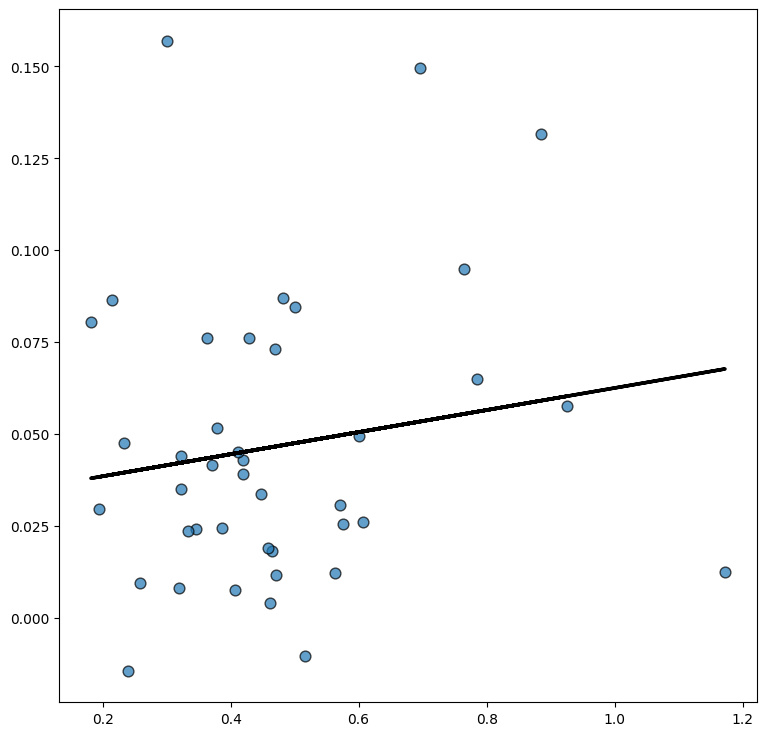

In [22]:
import matplotlib.pyplot as plt
df1 = grouped.get_group(('independent', 'predator_0', 'predator_1', 'ccm_1', 'dx'))[['5000', 'eval_assists']]
# df1.plot(x = 'eval_assists', y = '5000', kind = 'scatter')
# plt.show()
# plt.savefig('indp_r2_s3.png')
# Generate data
import numpy as np
x = df1['eval_assists']
y = df1['5000']
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 

# Plot regression line
ax.plot(x, a + b * x, color="k", lw=2.5)

41


<Axes: xlabel='eval_assists'>

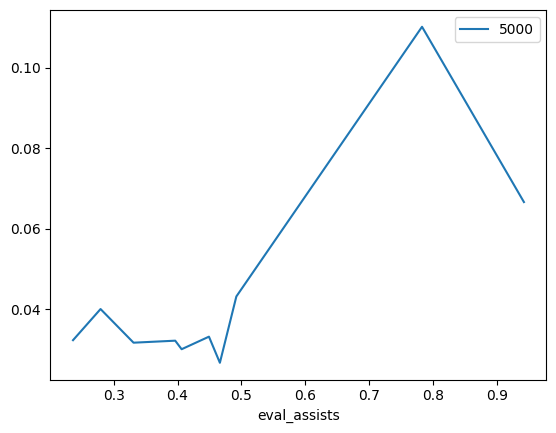

In [20]:
# Adjust these parameters as needed
window_size = 3  # Adjust the size of the rolling window
stride = 2       # Adjust the stride

df = df1.loc[:, ['5000', 'eval_assists']].copy()
df.sort_values(by=['eval_assists'], inplace=True)

# Adjust these parameters based on the desired number of data points (e.g., 10)
desired_data_points = 10
window_size = len(df) // desired_data_points  # Adjust the window size
stride = window_size  # Set the stride to the window size

# Apply rolling window and custom function
print(len(df))
result = df.rolling(window=window_size).apply(lambda x: x.mean(), raw=False)
result.dropna(inplace=True)
sampled_result = result.sample(n=desired_data_points)
sampled_result.sort_values(by=['eval_assists'], inplace=True)
sampled_result.plot(x = 'eval_assists', y = '5000', kind = 'line')

y = 0.03664 * x + -0.00870 * x^2 + 0.03374


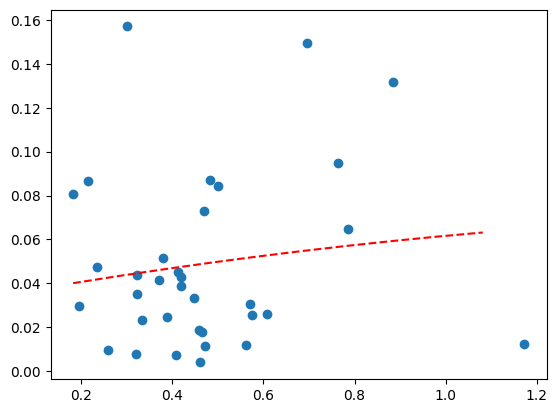

In [82]:
from scipy.optimize import curve_fit
from numpy import arange 
import matplotlib.pyplot as plt

# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

x = df1['eval_assists']
y = df1['5000']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 0.1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [81]:
x_line

array([0.18181818, 0.28181818, 0.38181818, 0.48181818, 0.58181818,
       0.68181818, 0.78181818, 0.88181818, 0.98181818, 1.08181818])

In [1]:
# simple solution that works; use it to verfiy results 
file_name_prefix = "" # _chaser, _fixed, _follower
_run_stats = dict()
collated_df = None
eval_df = None
for run in runs:
    # if run._state != "finished":
    if run._state != "finished":
        if run._state == "running":
            _run_stats['running_runs'] = _run_stats.get('running_runs', 0) + 1
        else:
            _run_stats['crashed_runs'] = _run_stats.get('crashed_runs', 0) + 1
        continue
    _run_stats['finished_runs'] = _run_stats.get('finished_runs', 0) + 1

    config = run.config
    if config['algorithm_type'] == ALGORITHM_TYPE and \
        config['env_config']['reward_type'] == REWARD_TYPE:
        _run_stats['matching_runs'] = _run_stats.get('matching_runs', 0) + 1

        if file_name_prefix == "":
            file_name_prefix = ALGORITHM_TYPE

        for file in run.files():
            if f"{file_name_prefix}_analysis" in file.name:
                analysis_table = pd.read_json(
                    file.download(exist_ok=True), 
                    orient='split')
                if collated_df is None:
                    collated_df = analysis_table
                else:
                    collated_df = pd.concat([collated_df, analysis_table])
            elif f"{file_name_prefix}_eval_df" in file.name:
                eval_stats = pd.read_json(
                    file.download(exist_ok=True), 
                    orient='split')
                if eval_df is None:
                    eval_df = eval_stats
                else:
                    eval_df = pd.concat([eval_df, eval_stats])
grouped_by_runs = collated_df.groupby(['mode', 'agent_a', 'test', 'dimension'])
grouped_by_runs[[str(i) for i in range(500, 5001, 500)]].agg(['mean', 'std', 'count'])

NameError: name 'runs' is not defined

In [23]:
grouped_by_runs.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [23]:
# results from fixed strategies; CALIBRATION
TEST_NAME = "ccm_1"
POLICY_SETS = ["chaser_chaser", "chaser_fixed", "chaser_follower", "fixed_follower", "follower_chaser"]
grouped_dfs = []
eval_dfs = None
for policy_set in POLICY_SETS:
    analyis_df = pd.read_csv(f"../experiments/results/{policy_set}_analysis.csv")
    eval_df = pd.read_csv(f"../experiments/results/{policy_set}_eval.csv")
    col_list = list(analyis_df.groupby(['mode', 'agent_a', 'agent_b', 'test', 'dimension']).mean().columns)
    agg_funs = []
    for col in col_list:
        if col != 'run_id':
            agg_funs.append((col, lambda x: round(x.mean(), 2)))
        else:
            agg_funs.append((col, 'count'))
        
    df2 = analyis_df.groupby(['mode', 'agent_a', 'agent_b', 'test', 'dimension']).agg(dict(agg_funs))
    grouped_dfs.append(df2) 
    eval_dfs = pd.concat([
        eval_dfs,
        pd.DataFrame([dict(name=policy_set,**dict(eval_df.mean()))])
    ]) if eval_dfs is not None else pd.DataFrame([dict(name=policy_set,**dict(eval_df.mean()))])

    if policy_set in ["chaser_chaser", "chaser_fixed", "chaser_follower"]:
        for dim in ["dx", "dy", "PCA_2"]:
            new_data = df2.loc[policy_set, 'predator_0', :, TEST_NAME, dim].T[1:]
            new_data.index.name = 'X'
            new_data.columns = [dim]
            dat_file = f"../results/data/{TEST_NAME}_{policy_set}_{dim}.dat"
            new_data.to_csv(dat_file, sep=' ')

eval_dfs.set_index('name', inplace=True)
with open("fixed_results.txt", "w") as f:
    f.write("EVALUATION simple map size 15, reward type 1, step penalty None\n")
    f.write(eval_dfs.to_string())
    f.write("\n\n")
    for df in grouped_dfs:
        f.write(df.to_string())
        f.write("\n\n")